<h3 align="center"> $Solving\:Lagrange\:equation\:for\:Harmonic\:Oscillator\:in\:python$ </h3> 
<h3 align="center"> $-Abhisek \: Sarkar$ </h3>

Importing necessery packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as smp

The harmonic oscillator is a system that oscillates with a frequency that is proportional to the spring constant of the system. It can be described by the following differential equation:

<h4 align="center"> m*x'' + k*x = 0 </h4>

where m is the mass of the oscillator, k is the spring constant, x is the displacement of the oscillator, and x'' is the second derivative of x with respect to time.

In [2]:
t = smp.symbols('t')
k = smp.symbols('k')
m = smp.symbols('m')
x = smp.symbols('x', cls=smp.Function)
x = x(t)
x_d = smp.diff(x, t)
x_dd = smp.diff(x_d, t)
eq = smp.Eq(m * x_dd + k*x, 0)
eq

Eq(k*x(t) + m*Derivative(x(t), (t, 2)), 0)

To solve this equation using the Lagrange method, we first need to define the Lagrangian of the system, which is given by:

<h4 align="center"> $\mathcal{L}$ = T - V </h4>

where T is the kinetic energy of the system and V is the potential energy of the system.

For a harmonic oscillator, the kinetic energy is given by:

<h4 align="center"> $T = \frac{1}{2} m x'^2 $</h4>

where $x'$ is the first derivative of x with respect to time.

In [3]:
# Kinetic Energy
T = 1/2 *m* (smp.diff(x, t)**2)
T

0.5*m*Derivative(x(t), t)**2

The potential energy is given by:

<h4 align="center"> $V = \frac{1}{2} k x^2 $</h4>

In [4]:
# Potential Energy
U = 1/2 * k * x**2
U

0.5*k*x(t)**2

Now we will find out the Lagrangian $\mathcal{L}=\:T\:-\:U$

In [5]:
# Lagrangian
L = T-U
L

-0.5*k*x(t)**2 + 0.5*m*Derivative(x(t), t)**2

Now we have to get the Euler Lagrangian equation,

<center> $\frac{\partial \mathcal{L}}{\partial x} - \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot{x}} = 0$

Here we will do,
<center> $\frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot{x}} = \frac{\partial \mathcal{L}}{\partial x}$

Substituting these expressions into the equation for the Lagrangian, we get:

In [6]:
rhs = L.diff(x)
rhs

-1.0*k*x(t)

In [7]:
lhs = L.diff(x.diff(t)).diff(t)
lhs

1.0*m*Derivative(x(t), (t, 2))

In [8]:
x_double_dot = smp.solve(smp.Eq(rhs,lhs),x.diff(t,2))
x_double_dot

[-k*x(t)/m]

To solve this second-order differential equation $x'' = - \frac{kx}{m}$, we will use the scipy library in Python. 

In [9]:
from scipy.integrate import solve_ivp
import numpy as np

def func(t, y):
    # y[0] is x, y[1] is x'
    return [y[1], -k * y[0] / m]

k = 4.0 # coefficient in the equation
m = 2.0 # mass

# Initial condition: x(0) = 0, x'(0) = 1
y0 = [0, 1]

# Solve the equation from t=0 to t=10
t_span = [0, 10]
solution = solve_ivp(func, t_span, y0)

# Print the solution
print(solution.t) # time points
print(solution.y) # solution


[0.00000000e+00 9.99000999e-04 1.09890110e-02 1.10889111e-01
 6.02748763e-01 1.27395051e+00 1.96300157e+00 2.66143944e+00
 3.31920611e+00 4.02526204e+00 4.71086687e+00 5.37813462e+00
 6.08199347e+00 6.75087253e+00 7.45056858e+00 8.14420671e+00
 8.79189329e+00 9.49849715e+00 1.00000000e+01]
[[ 0.00000000e+00  9.99000667e-04  1.09885687e-02  1.10435157e-01
   5.32368390e-01  6.88280875e-01  2.52320423e-01 -4.12662519e-01
  -7.06955026e-01 -3.92848059e-01  2.62780513e-01  6.85736231e-01
   5.17495737e-01 -8.81856862e-02 -6.34815448e-01 -6.11663377e-01
  -9.11191655e-02  5.40567644e-01  7.06962803e-01]
 [ 1.00000000e+00  9.99999002e-01  9.99879244e-01  9.87728782e-01
   6.58131681e-01 -2.29072440e-01 -9.34122593e-01 -8.11989445e-01
  -1.71663604e-02  8.31388959e-01  9.28297972e-01  2.43596339e-01
  -6.81323820e-01 -9.92076931e-01 -4.40206391e-01  5.01482381e-01
   9.91512502e-01  6.44420481e-01 -8.87838970e-03]]


To plot the solutions, we will use matplotlib library.

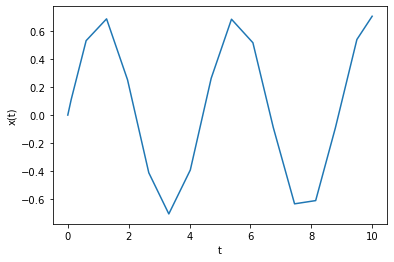

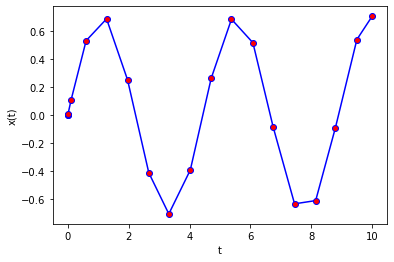

In [10]:
import matplotlib.pyplot as plt

# Extract the solution arrays from the solution object
t = solution.t
x = solution.y[0]

# Plot the solution
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()


plt.plot(t, x,'-ob',markerfacecolor="red")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

Now we will fit the plot with a function such as $A sin (\omega t + \phi)$. Thus function will be fitted to the data (t, x) using the curve_fit function from scipy, and the fitted function will be plotted on top of the original data. The fitted parameters $\omega$ and $\phi$ will be stored in the variables w_fit and phi_fit, respectively.

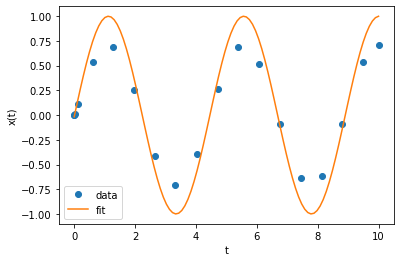

In [11]:
from scipy.optimize import curve_fit

def sin_func(t, w, phi):
    return np.sin(w * t + phi)

# Fit the function to the data
params, params_covariance = curve_fit(sin_func, t, x)

# Extract the fitted parameters
w_fit, phi_fit = params

# Plot the fitted function
t_fit = np.linspace(t[0], t[-1], 100)
x_fit = sin_func(t_fit, w_fit, phi_fit)

plt.plot(t, x, 'o', label='data')
plt.plot(t_fit, x_fit, '-', label='fit')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

Now we will find the values of '$A$' and '$\phi$' in the equation $y = A sin(\omega t + \phi)$ using the curve_fit function from scipy

In [12]:
from scipy.optimize import curve_fit

def sin_func(t, a, w, phi):
    return a * np.sin(w * t + phi)

# Fit the function to the data
params, params_covariance = curve_fit(sin_func, t, x)

# Extract the fitted parameters
a_fit, w_fit, phi_fit = params

# Print the values of 'a' and 'phi'
print("a =", a_fit)
print("phi =", phi_fit)

a = 0.7070408614720778
phi = -6.0936891314352756e-05
